# Case Study -  analyse and predict the data of the hourly vehicle counts of particular highway in the year of 1995 beginning from the month of August.

#### Import the necessary libraries.

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.rcParams['figure.figsize']=(15,8)

##  Reading the data as an hourly Time Series from the '.csv' file and plot the Time Series data.

In [58]:
df = pd.read_csv("Vehicle.csv")
df.head()

Hour  Vehicles
0     1       699
1     2       346
2     3       193
3     4       191
4     5       193

In [68]:
dti = pd.date_range("1995-08-01", periods=1689, freq="H")
dti

DatetimeIndex(['1995-08-01 00:00:00', '1995-08-01 01:00:00',
               '1995-08-01 02:00:00', '1995-08-01 03:00:00',
               '1995-08-01 04:00:00', '1995-08-01 05:00:00',
               '1995-08-01 06:00:00', '1995-08-01 07:00:00',
               '1995-08-01 08:00:00', '1995-08-01 09:00:00',
               ...
               '1995-10-09 23:00:00', '1995-10-10 00:00:00',
               '1995-10-10 01:00:00', '1995-10-10 02:00:00',
               '1995-10-10 03:00:00', '1995-10-10 04:00:00',
               '1995-10-10 05:00:00', '1995-10-10 06:00:00',
               '1995-10-10 07:00:00', '1995-10-10 08:00:00'],
              dtype='datetime64[ns]', length=1689, freq='H')

In [69]:
df['DTI'] = dti

In [70]:
df.set_index('DTI',inplace=True)

In [71]:
df

Hour  Vehicles
DTI                                
1995-08-01 00:00:00     1       699
1995-08-01 01:00:00     2       346
1995-08-01 02:00:00     3       193
1995-08-01 03:00:00     4       191
1995-08-01 04:00:00     5       193
...                   ...       ...
1995-10-10 04:00:00  1685       194
1995-10-10 05:00:00  1686       373
1995-10-10 06:00:00  1687      1218
1995-10-10 07:00:00  1688      4076
1995-10-10 08:00:00  1689      5137

[1689 rows x 2 columns]

##  Checking the basic measures of descriptive statistics of the Time Series. Also, check how many days of data do we have and plot the Time Series with the mean and median of the Time Series.

In [4]:
df.describe()

Vehicles
count  1689.000000
mean   2060.417999
std    1339.545842
min     154.000000
25%     851.000000
50%    2262.000000
75%    2924.000000
max    5549.000000

In [5]:
df['Vehicles'].median()

2262.0

How many days of data we have?

In [6]:
len(df)/24

70.375

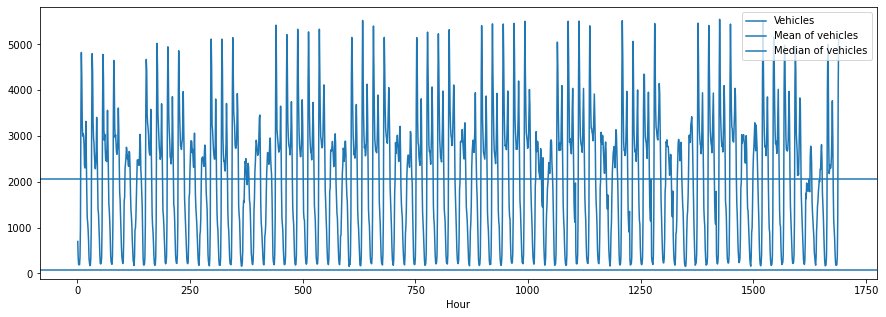

In [7]:
# plt.figure(figsize=(15,5))
df.plot(figsize=(15,5))
plt.axhline(2060.417999,label=('Mean of vehicles'))
plt.axhline(70.375,label=('Median of vehicles'))
plt.legend()
plt.show()

##  Decomposing the Time Series to understand the various components.

In [182]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_add_decompose = seasonal_decompose(df['Vehicles'][:100], model='additive',period=24)

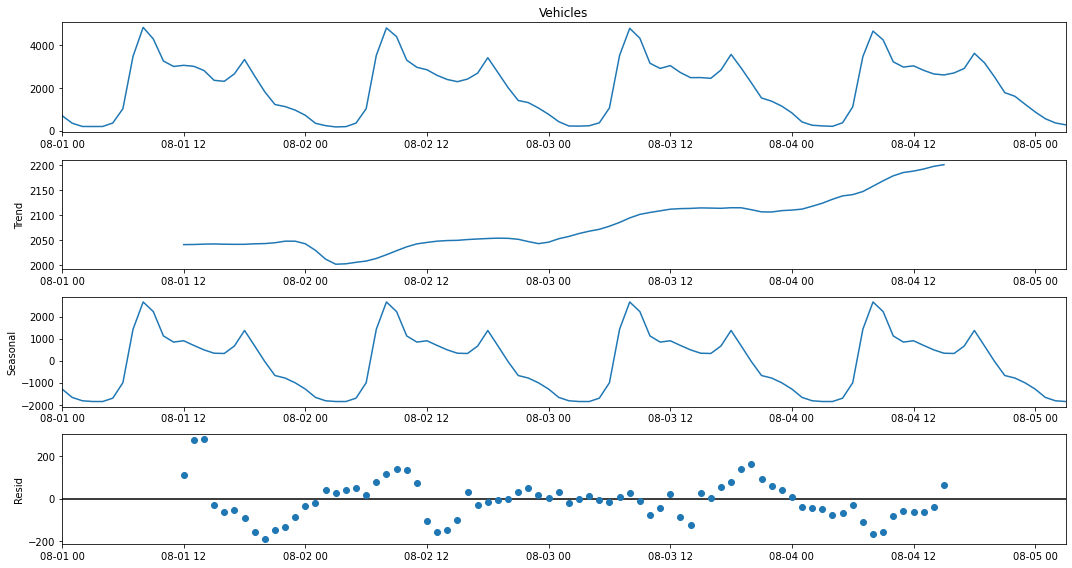

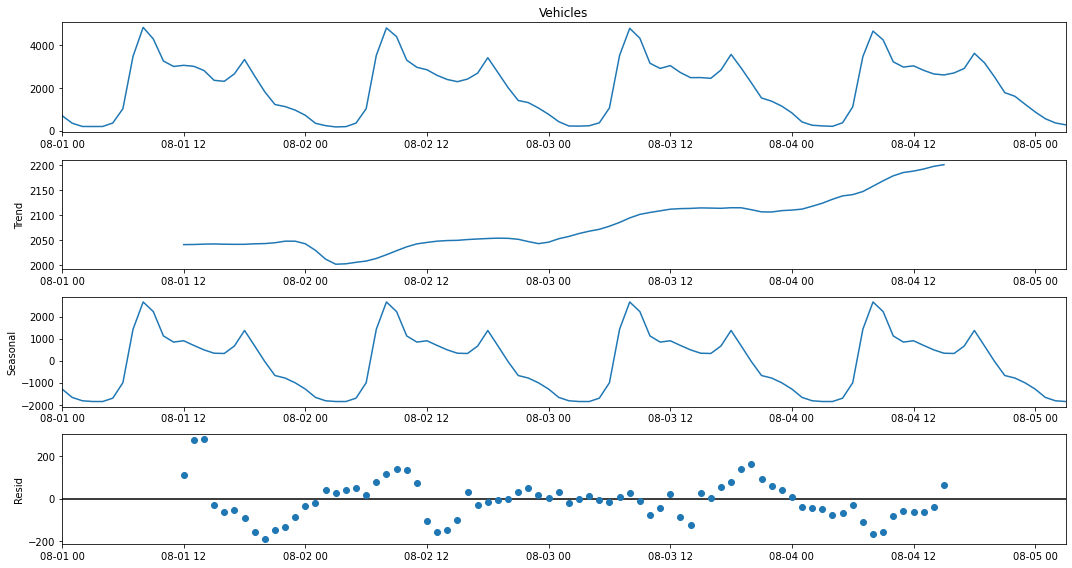

In [183]:
df_add_decompose.plot()

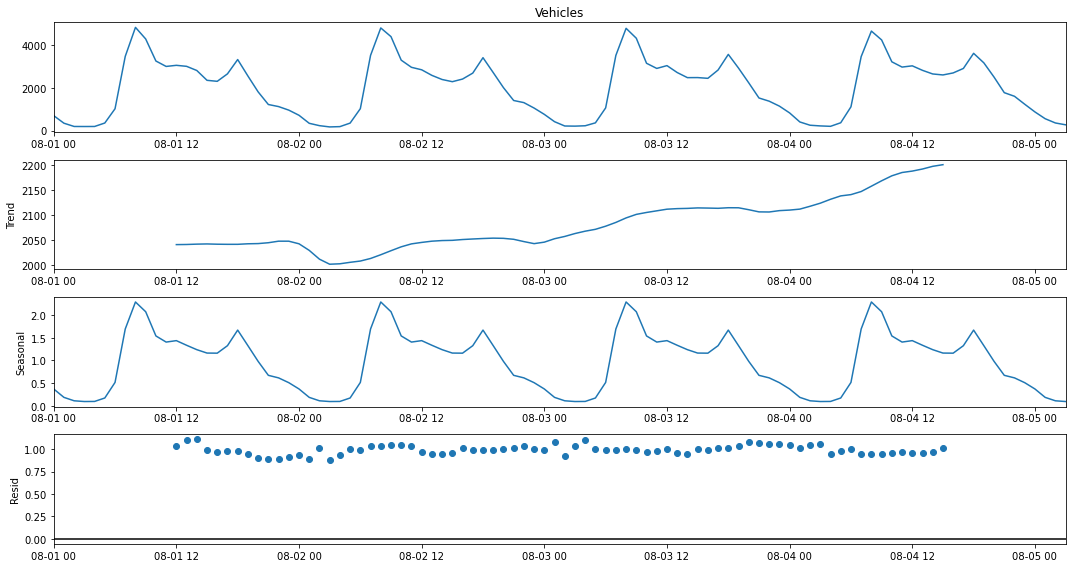

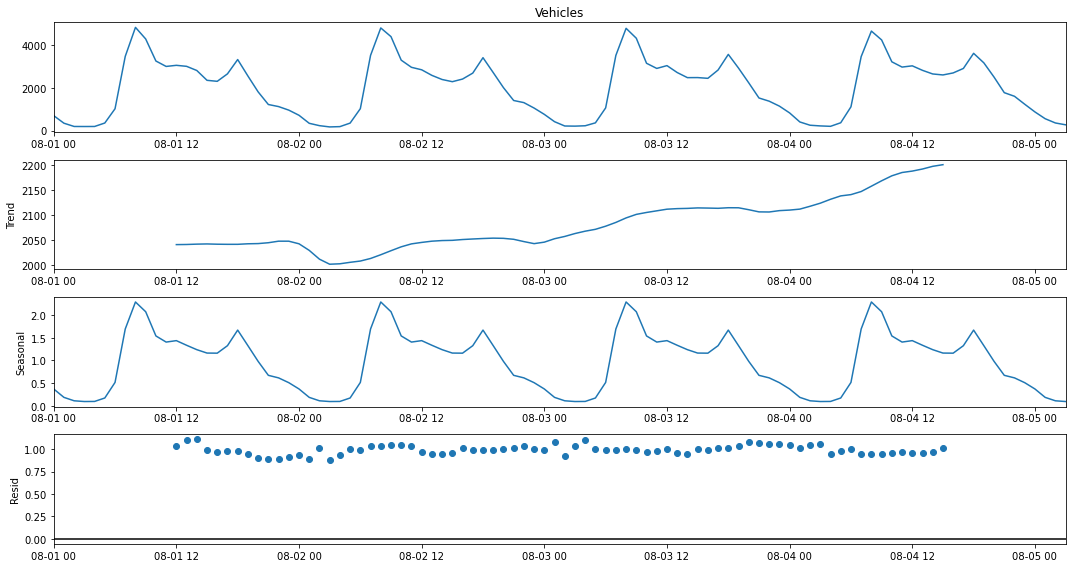

In [184]:
df_mul_decompose = seasonal_decompose(df['Vehicles'][:100], model='multiplicative',period=24)
df_mul_decompose.plot()

In [ ]:
The Multiplicative model seems better , because the residuals do not form any pattern.

##  Spliting the data into train and test and plot the training and test data.

In [75]:
train = df[0 : int(len(df)*0.7)]
test = df[int(len(df)*0.7): ]

In [76]:
print(len(df))
print(len(train))
print(len(test))


1689
1182
507


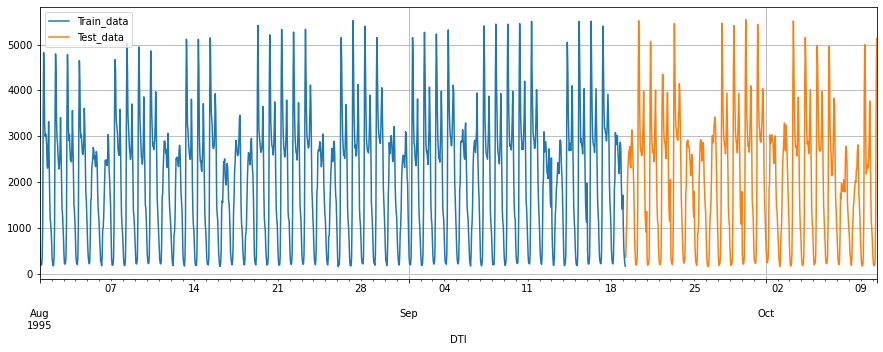

In [47]:
plt.figure(figsize=(15,5))
train['Vehicles'].plot()
test['Vehicles'].plot()
plt.grid()
plt.legend(['Train_data','Test_data'])
plt.show()

## Model 1: Building a Linear Regression using the Time Stamped order of occurence of the vehicle count.

In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [62]:
lr.fit(train[['Hour']],train[['Vehicles']])

LinearRegression()

In [63]:
y_pred = lr.predict(test[['Hour']])

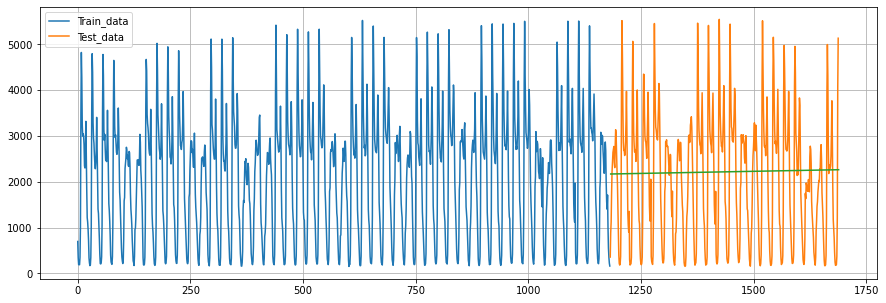

In [64]:
plt.figure(figsize=(15,5))
train['Vehicles'].plot()
test['Vehicles'].plot()
plt.plot(test['Hour'],y_pred, label=["regression"])
plt.grid()
plt.legend(['Train_data','Test_data'])
plt.show()

## Evaluating this model on the test data using Root Mean Squared Error (RMSE).

In [65]:
from sklearn import metrics
model_1 = metrics.mean_squared_error(test['Vehicles'],y_pred,squared=False)

In [66]:
result = pd.DataFrame({'Test RMSE' : [model_1]},index = [' Regression model'] )

In [67]:
result

Test RMSE
 Regression model  1362.674158

## Model 2: Building a Simple Exponential Smoothing model by using the parameter 'optimise=True' within the '.fit()' function. Then,evaluate the same model on the test set using RMSE.

In [73]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

In [77]:
model_SES = SimpleExpSmoothing(train, initialization_method='estimated')

C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [78]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [79]:
model_SES_autofit.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': -1197.6666666666658,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [80]:
SES_predict = model_SES_autofit.forecast(steps = len(test))
SES_predict

1995-09-19 06:00:00    163.318201
1995-09-19 07:00:00    163.318201
1995-09-19 08:00:00    163.318201
1995-09-19 09:00:00    163.318201
1995-09-19 10:00:00    163.318201
                          ...    
1995-10-10 04:00:00    163.318201
1995-10-10 05:00:00    163.318201
1995-10-10 06:00:00    163.318201
1995-10-10 07:00:00    163.318201
1995-10-10 08:00:00    163.318201
Freq: H, Length: 507, dtype: float64

In [81]:
model_SES = metrics.mean_squared_error(test['Vehicles'],SES_predict,squared=False)


In [82]:
result_t = pd.DataFrame({'Test RMSE' : [model_SES]},index = [' SES model'] )

In [83]:
result = pd.concat([result,result_t])
result

Test RMSE
 Regression model  1362.674158
 SES model         2322.773950

## Model 3: Building a Double Exponential Smoothing model by using the parameter 'optimise=True' within the '.fit()' function. Then,evaluate the same model on the test set using RMSE.

In [72]:
df.drop('Hour',axis=1 ,inplace=True)
df

Vehicles
DTI                          
1995-08-01 00:00:00       699
1995-08-01 01:00:00       346
1995-08-01 02:00:00       193
1995-08-01 03:00:00       191
1995-08-01 04:00:00       193
...                       ...
1995-10-10 04:00:00       194
1995-10-10 05:00:00       373
1995-10-10 06:00:00      1218
1995-10-10 07:00:00      4076
1995-10-10 08:00:00      5137

[1689 rows x 1 columns]

In [84]:
model_DES = Holt(train, initialization_method='estimated')
model_DES = model_DES.fit()
model_DES.params

C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.995,
 'smoothing_trend': 0.995,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': -1197.6666666666658,
 'initial_trend': 501.0121212121212,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [85]:
DES_pred = model_DES.forecast(len(test))

In [86]:
model_DES = metrics.mean_squared_error(test['Vehicles'],DES_pred,squared=False)
result_t = pd.DataFrame({'Test RMSE' : [model_DES]},index = [' DES model'] )

In [87]:
result = pd.concat([result,result_t])
result

Test RMSE
 Regression model   1362.674158
 SES model          2322.773950
 DES model         20198.794201

## Model 4: Building a Triple Exponential Smoothing model by using the parameter 'optimise=True' within the '.fit()' function. Then,evaluate the same model on the test set using RMSE.

In [88]:
model_TES = ExponentialSmoothing(train, trend='additive', seasonal='additive', initialization_method='estimated',seasonal_periods=70)
model_TES = model_TES.fit()
model_TES.params

C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.9901097680900496,
 'smoothing_trend': 0.9901097680900496,
 'smoothing_seasonal': 0.00989023190995042,
 'damping_trend': nan,
 'initial_level': 2104.1018937070116,
 'initial_trend': -26.489786195708415,
 'initial_seasons': array([  300.83464114,   296.77302771,   -16.78025944,  -430.42901818,
         -819.70614251,  -992.6802103 , -1335.09912539, -1373.80569449,
        -1300.74623354,  -854.3316946 ,  -404.10073704,   -10.2038865 ,
          510.24045601,   714.60166616,  1232.57848312,  1482.42920826,
         1606.85336933,  1222.39487312,   936.42948579,   805.76985679,
          919.16675915,   920.92170716,   828.16233746,   698.59605855,
          412.86340127,   319.19446324,    32.70792527,  -405.81132728,
         -894.20860868, -1190.70765765, -1376.47177713, -1490.79152163,
        -1533.50171393, -1470.02504457,  -692.95593788,   -73.54633039,
          737.33392112,   853.47643203,   641.61023743,   561.21831742,
          654.19706122,   729.3853269

In [89]:
TES_pred = model_TES.forecast(len(test))

In [90]:
model_TES = metrics.mean_squared_error(test['Vehicles'],TES_pred,squared=False)
result_t = pd.DataFrame({'Test RMSE' : [model_TES]},index = [' TES model'] )

In [91]:
result = pd.concat([result,result_t])
result

Test RMSE
 Regression model   1362.674158
 SES model          2322.773950
 DES model         20198.794201
 TES model         76824.932711

## Which model performs the best?

In [ ]:
From the above observation the Regression Model performs better.

Tweak the different parameters for each of these models and try to come up with a better accuracy (less RMSE)

##### Note: You can go ahead and attempt the following questions now or wait until after the mentored learning session. During the mentor learning sessions, you will get clarity on how to solve the following questions.

## Model 5: Building a Simple Exponential Smoothing model by taking the best alpha [in the range of 0.01 to 1 taking an interval of 0.01] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [92]:
SES_tune = SimpleExpSmoothing(train, initialization_method='estimated')

C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [95]:
alpha = np.arange(0.01,1,0.01)

In [132]:
model = SimpleExpSmoothing(train,initialization_method='estimated')
score_evaluation=[]
for i in alpha:    
    model_opt =  model.fit(smoothing_level = i, optimized=False)
    y_pred = model_opt.forecast(len(test))
    score_evaluation.append(metrics.mean_squared_error(test['Vehicles'],y_pred,squared=False))


C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [141]:
score_ev = pd.DataFrame()
score_ev['alpha']  = alpha
score_ev['RMSE'] = score_evaluation
score_ev.sort_values('RMSE',ascending=True)
score_ev.style.highlight_min('RMSE')

In [143]:
model_opt =  model.fit(smoothing_level = 0.02 ,optimized=False)
y_pred = model_opt.forecast(len(test))
metrics.mean_squared_error(test['Vehicles'],y_pred,squared=False)

1350.523209376406

we got the best alpha value as 0.02 and the best RMSE score is 1350.523

## Model 6: Building a Double Exponential Smoothing model by taking the best alpha and beta [both in the range of 0.01 to 1 taking an interval of 0.01] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [152]:
model = Holt(train,initialization_method='estimated')
score_evaluation= pd.DataFrame()
for i in alpha:
    for j in alpha:
        model_opt =  model.fit(smoothing_level = i,smoothing_trend = j, optimized=False)
        y_pred = model_opt.forecast(len(test))
        rmse = metrics.mean_squared_error(test['Vehicles'],y_pred,squared=False)
        score_evaluation = score_evaluation.append({'smoothing_level': i,'smoothing_trend': j,'RMSE': rmse},ignore_index=True)


C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [154]:
score_evaluation.style.highlight_min('RMSE')

from the above tunning we got the best results for RMSE at 1350.068819 having the smoothing_level at 0.01000 and smoothing trend
at 0.05. Also the RMSE value was directly calculated for test Data only.

## Model 7: Building a Triple Exponential Smoothing model by taking the best alpha, beta and gamma [all in the range of 0.1 to 1 taking an interval of 0.1] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [161]:
model = ExponentialSmoothing(train, trend='additive', seasonal='additive', initialization_method='estimated')
score_evaluation= pd.DataFrame()
for i in alpha:
    model_opt =  model.fit(smoothing_level = 0.01,smoothing_trend = 0.05,smoothing_seasonal = i, optimized=False)
    y_pred = model_opt.forecast(len(test))
    rmse = metrics.mean_squared_error(test['Vehicles'],y_pred,squared=False)
    score_evaluation = score_evaluation.append({'smoothing_level': 0.01,'smoothing_trend': 0.05,'smoothing_seasonal': i,'RMSE': rmse},ignore_index=True)


C:\Users\harip\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [162]:
score_evaluation.style.highlight_min('RMSE')

In [ ]:
It takes long time for the above code to execute, so considering the above two model we take best value for alpha and beta as
0.01 and 0.05, well search for best value for gamma alone

In [166]:
model_opt =  model.fit(smoothing_level = 0.01,smoothing_trend = 0.05,smoothing_seasonal = 0.27, optimized=False)
y_pred = model_opt.forecast(len(test))
rmse = metrics.mean_squared_error(test['Vehicles'],y_pred,squared=False)
    

In [167]:
rmse

656.1724891894685

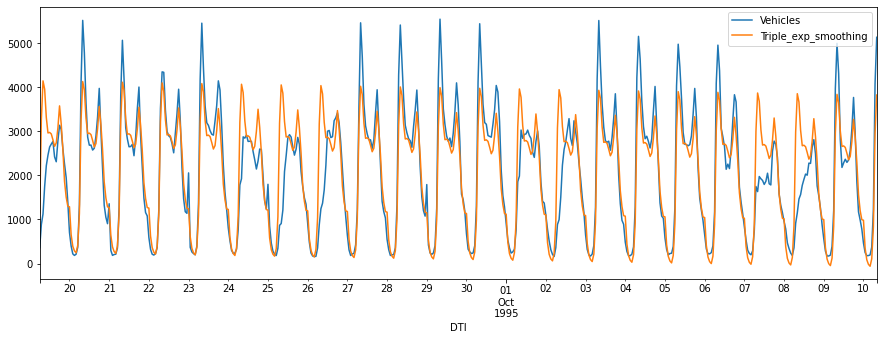

In [176]:
test.plot(figsize=(15,5))
y_pred.plot(figsize=(15,5),label='Triple_exp_smoothing')
plt.legend()
plt.show()

## Which model performs the best?

From the above all models , the Triple Exponential smoothing 

for

smoothing_level = 0.01,
smoothing_trend = 0.05,
smoothing_seasonal = 0.27

has the overall RMSE lower , i.e 656, so it considered as the best among the models we have tried.